In [1]:
# Create a sample customer_churn.csv file
import pandas as pd

# Sample data
data = {
    'tenure': [12, 24, 5, 36],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
    'Churn': ['Yes', 'No', 'Yes', 'No']
}

# Convert to DataFrame
df_sample = pd.DataFrame(data)

# Save to CSV
df_sample.to_csv('customer_churn.csv', index=False)

print("✅ Sample customer_churn.csv file created successfully.")


✅ Sample customer_churn.csv file created successfully.


✅ Data loaded successfully.

📋 First few rows of the dataset:
   tenure  MonthlyCharges        Contract              PaymentMethod Churn
0      12           29.85  Month-to-month           Electronic check   Yes
1      24           56.95        One year               Mailed check    No
2       5           53.85  Month-to-month  Bank transfer (automatic)   Yes
3      36           42.30        Two year    Credit card (automatic)    No

📊 Confusion Matrix:
[[0 1]
 [0 0]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklea

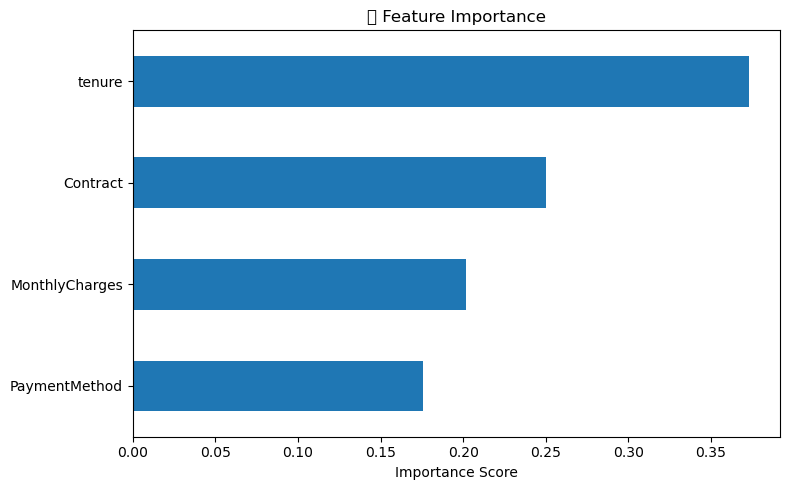

In [2]:
# FULL CODE

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load the dataset with error handling
try:
    df = pd.read_csv('customer_churn.csv')  # Make sure this file is in the same folder
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the filename and path.")
    df = None

# Step 3: Proceed only if data was loaded
if df is not None:
    # Preview and clean the data
    print("\n📋 First few rows of the dataset:")
    print(df.head())

    # Replace blank strings with NaN and drop missing values
    df.replace(" ", np.nan, inplace=True)
    df.dropna(inplace=True)

    # Convert 'TotalCharges' to numeric if it exists
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df.dropna(subset=['TotalCharges'], inplace=True)

    # Step 4: Encode categorical variables
    label_cols = df.select_dtypes(include='object').columns.tolist()
    if 'Churn' in label_cols:
        label_cols.remove('Churn')  # We'll encode Churn separately

    le = LabelEncoder()
    for col in label_cols:
        df[col] = le.fit_transform(df[col])

    # Encode target variable
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Step 5: Select features and target
    features = ['tenure', 'MonthlyCharges', 'Contract', 'PaymentMethod']
    available_features = [f for f in features if f in df.columns]

    if not available_features:
        print("❌ No valid features found in the dataset.")
    else:
        X = df[available_features]
        y = df['Churn']

        # Step 6: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Step 7: Train the model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Step 8: Make predictions
        y_pred = model.predict(X_test)

        # Step 9: Evaluate the model
        print("\n📊 Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        print("\n📋 Classification Report:")
        print(classification_report(y_test, y_pred))

        # Step 10: Visualize feature importance
        importances = model.feature_importances_
        feat_imp = pd.Series(importances, index=available_features)
        plt.figure(figsize=(8, 5))
        feat_imp.sort_values().plot(kind='barh', title='🔍 Feature Importance')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()


In [1]:
# DATA PREPROCESSING 

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the dataset
df = pd.read_csv('customer_churn.csv')  # Make sure this file is in your working directory

# Step 3: Handle missing values
# Replace blank strings with NaN
df.replace(" ", np.nan, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Step 4: Convert 'TotalCharges' to numeric (if it exists)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df.dropna(subset=['TotalCharges'], inplace=True)

# Step 5: Encode categorical variables
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove target column 'Churn' from encoding (we'll handle it separately)
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode the target column 'Churn' as binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 6: Preview the cleaned data
print("✅ Preprocessed Data:")
print(df.head())


✅ Preprocessed Data:
   tenure  MonthlyCharges  Contract  PaymentMethod  Churn
0      12           29.85         0              2      1
1      24           56.95         1              3      0
2       5           53.85         0              0      1
3      36           42.30         2              1      0


✅ Accuracy: 0.00

📊 Confusion Matrix:
[[0 1]
 [0 0]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\racha\anaconda3\Lib\site-packages\sklea

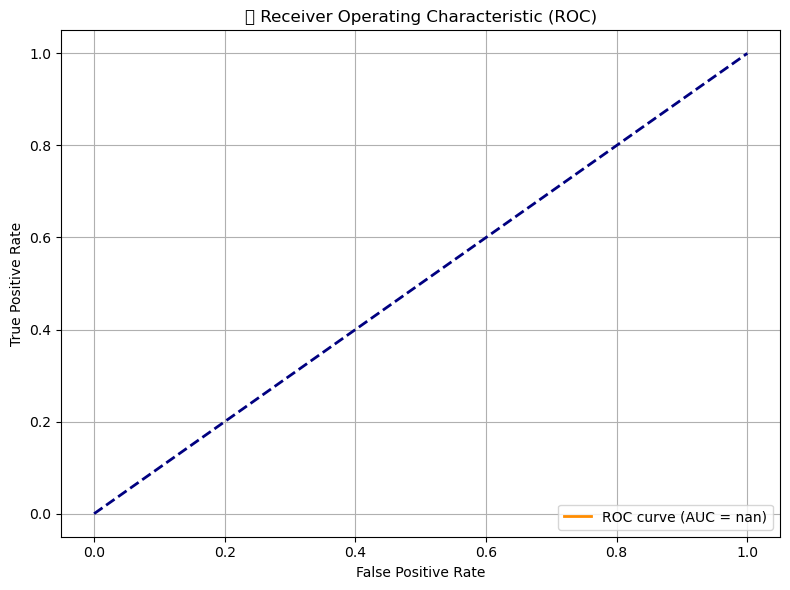

In [3]:
#MODEL TRAINING AND EVALUATION

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Step 2: Load the dataset
df = pd.read_csv('customer_churn.csv')  # Make sure this file is in your working directory

# Step 3: Handle missing values
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Step 4: Convert 'TotalCharges' to numeric if it exists
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df.dropna(subset=['TotalCharges'], inplace=True)

# Step 5: Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 6: Define features and target
features = ['tenure', 'MonthlyCharges', 'Contract', 'PaymentMethod']
available_features = [f for f in features if f in df.columns]

X = df[available_features]
y = df['Churn']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 11: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🧪 Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# SAMPLE PREDICTION 

# Step 1: Create sample input data (same structure as your features)
sample_data = pd.DataFrame({
    'tenure': [6, 30, 12],
    'MonthlyCharges': [70.35, 45.50, 99.99],
    'Contract': [0, 1, 2],           # Example: 0 = Month-to-month, 1 = One year, 2 = Two year
    'PaymentMethod': [1, 2, 0]       # Example: encoded values from LabelEncoder
})

# Step 2: Make predictions
sample_predictions = model.predict(sample_data)
sample_probabilities = model.predict_proba(sample_data)[:, 1]  # Probability of churn

# Step 3: Display results
for i in range(len(sample_data)):
    status = "Churn" if sample_predictions[i] == 1 else "Not Churn"
    print(f"Customer {i+1}: {status} (Probability: {sample_probabilities[i]:.2f})")


Customer 1: Churn (Probability: 0.77)
Customer 2: Not Churn (Probability: 0.50)
Customer 3: Churn (Probability: 0.67)
